In [1]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import load_json_model
import pandas as pd

from os import path
import re
from tqdm.notebook import tqdm
from pymodulon.util import _parse_sample

In [2]:
import plotly.graph_objects as go
import plotly.express as px


In [3]:
plt.rcParams['svg.fonttype'] = 'none'

In [4]:
ica_data = load_json_model('../../putidaPRECISE321.json')

## FleQ iModulons

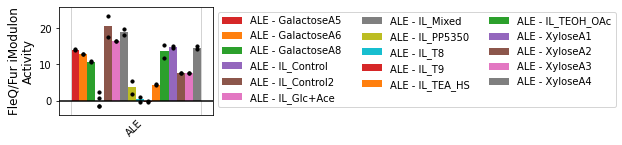

In [5]:
fig=plot_activities(ica_data,'FleQ/Fur', projects={'ALE'}, highlight={'ALE'})

In [6]:
fig.get_figure().savefig("./raw_files_new/Fig2b_FleQ_Fur_activity.svg",dpi=300)

In [7]:
groups = {'SRX8894563':'M9 evolved', 
          'SRX8894564':'M9 evolved',
          'SRX8894565':'M9 evolved',
          'SRX8894566':'M9 evolved',
          'SRX8894567':'M9 evolved',
          'SRX8894568':'M9 evolved',
          'SBRG_IL__wt__1':'High aeration',
          'SBRG_IL__wt__2':'High aeration',
          'SRX8894553':'M9 evolved',
          'SRX8894554':'M9 evolved',
          'SRX8894555':'M9 evolved',
          'SRX8894556':'M9 evolved',
          'SRX8894557':'M9 evolved',
          'SRX8894558':'M9 evolved',
          'SRX8894559':'M9 evolved',
          'SRX8894560':'M9 evolved',
          'SRX8245722':'Ionic Liquid',
          'SRX8245723':'Ionic Liquid',
          'SBRG_IL__IL3__1':'Ionic Liquid',
          'SBRG_IL__IL3__2':'Ionic Liquid',
          'SRX8245726':'Acetate',
          'SRX8245727':'Acetate',
          'SRX2012752':'NaCl',
          'SRX2012754':'NaCl',
          'SRX2012756':'NaCl',
          'SRX5739419':'DfleQ strain1',
        'SRX5739420':'DfleQ strain1',
        'SRX5739421':'DfleQ strain1',
          
'GB045_f_1':'DfleQ strain2',
'GB045_f_2':'DfleQ strain2',
'GB045_f_3':'DfleQ strain2',
'GB045_fg_1':'DfleQ strain2',
'GB045_fg_2':'DfleQ strain2',
'GB045_gfg_1':'DfleQ strain2',
'GB045_gfg_2':'DfleQ strain2',
'GB045_gfg_3':'DfleQ strain2',
'GB045_gg_1':'DfleQ strain2',
'GB045_gg_2':'DfleQ strain2',
'GB045_gg_3':'DfleQ strain2',
'GB045_glc_1':'DfleQ strain2',
'GB045_glc_2':'DfleQ strain2',
'GB045_glc_3':'DfleQ strain2',
'GB045_glu_1':'DfleQ strain2',
'GB045_glu_2':'DfleQ strain2',
'GB045_glu_3':'DfleQ strain2'
          }

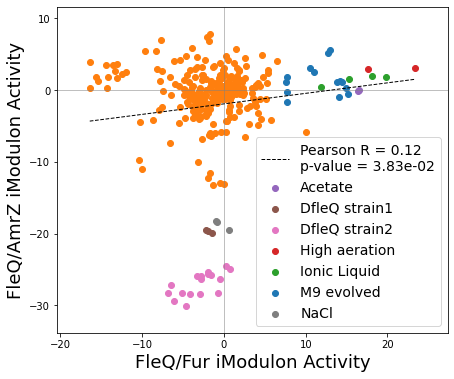

In [8]:
fig = compare_activities(ica_data,
                         'FleQ/Fur','FleQ/AmrZ', 
                         groups=groups, 
                        ax_font_kwargs={'fontsize':18},
                        legend_kwargs={'fontsize':14, 'loc':0})

fig.figure.set_size_inches(7,6)

In [9]:
fig.get_figure().savefig("./raw_files_new/Fig2d_FleQ_comparison.svg",dpi=300)

## The Zur iModulon

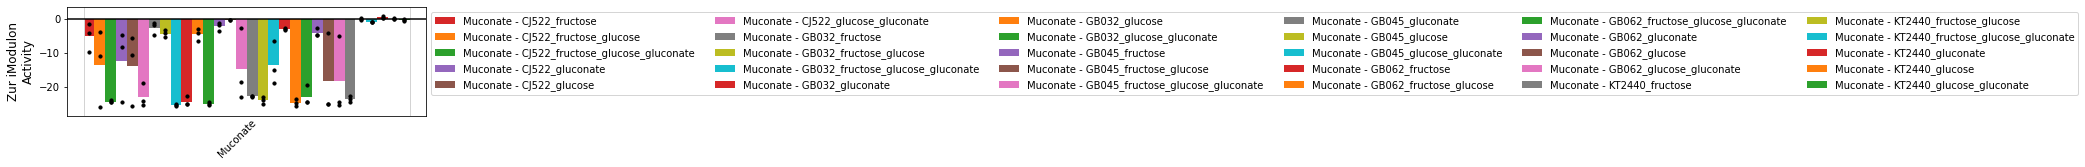

In [12]:
fig=plot_activities(ica_data,'Zur', highlight={'Muconate'}, projects={'Muconate'})
fig.get_figure().savefig("./raw_files_new/Fig3f_Zur_activities_Muconatae.svg")

## The PP_0204/CysB iModulon

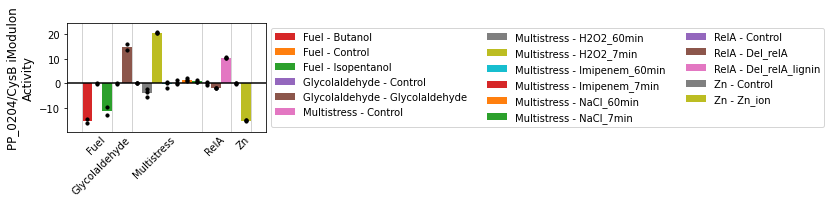

In [14]:
fig=plot_activities(ica_data,'PP_0204/CysB',
                    projects={"Fuel",'Glycolaldehyde','Multistress','RelA','Zn'},
                    highlight={"Fuel",'Glycolaldehyde','Multistress','RelA','Zn'})

In [15]:
fig.get_figure().savefig("./raw_files_new/Fig2j_CysB_activity.svg")

In [16]:
# Search an iModulon similar to PP_0204 iModulon in E. coli

In [17]:
from pymodulon.compare import *
from pymodulon.compare import _get_orthologous_imodulons
from pymodulon.compare import convert_gene_index

In [18]:
#Exchange gene and subject column names

BBH = pd.read_csv('../../data/external/other_precise_data/eColi_full_protein_vs_pPutida_full_protein_parsed.csv',index_col=0)
BBH=BBH.rename(columns={'subject':'temp'})
BBH=BBH.rename(columns={'gene':'subject'})
BBH=BBH.rename(columns={'temp':'gene'})

BBH.to_csv('../../data/external/other_precise_data/pputida_vsEcoli_bbh.csv')

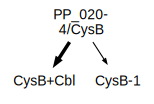

In [20]:
pp_0204=pd.DataFrame(ica_data.M['PP_0204/CysB'])

ecoli_data = load_json_model('../../data/external/other_precise_data/Ecoli_precise2.json')

dots,links = compare_ica(pp_0204,ecoli_data.M, cutoff=0.2,
                         ortho_file = '../../data/external/other_precise_data/pputida_vsEcoli_bbh.csv')

links

In [22]:
#Plot PP_0204 and CysB+Cbl gene weights

new_M1, new_M2 = convert_gene_index(ica_data.M, ecoli_data.M,
                         ortho_file = '../../data/external/other_precise_data/pputida_vsEcoli_bbh.csv',)

PP_0204_M=pd.DataFrame()
PP_0204_M['Pputida'] = new_M1['PP_0204/CysB']
PP_0204_M['Ecoli'] = new_M2['CysB+Cbl']

In [24]:
PP_0204_M[(PP_0204_M['Pputida']>ica_data.thresholds['PP_0204/CysB']) & (PP_0204_M['Ecoli']>ecoli_data.thresholds['CysB+Cbl'])].index

Index(['PP_0233', 'PP_0232', 'PP_0231', 'PP_0230', 'PP_0240', 'PP_0239',
       'PP_0238', 'PP_0237', 'PP_0236', 'PP_5171'],
      dtype='object')

In [ ]:
groups={'PP_0233':'Pputida',
        'PP_0232':'Pputida', 
        'PP_0231':'Pputida', 
        'PP_0230':'Pputida', 
        'PP_0240':'Pputida', 
        'PP_0239':'Pputida',
       'PP_0238':'Pputida',
        'PP_0237':'Pputida', 
        'PP_0236':'Pputida', 
       'PP_5171':'Pputida'
       }

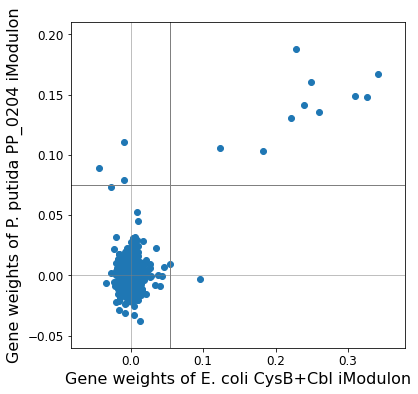

In [26]:
ax = scatterplot(x=PP_0204_M['Ecoli'], y=PP_0204_M['Pputida'], groups=groups, 
                 xlabel='Gene weights of E. coli CysB+Cbl iModulon', 
                 ylabel='Gene weights of P. putida PP_0204 iModulon',
                 legend=False,
                ax_font_kwargs={'fontsize':16},
                )
ax.axvline(linewidth=1, x=ecoli_data.thresholds['CysB+Cbl'], color='gray')
ax.axhline(linewidth=1, y=ica_data.thresholds['PP_0204/CysB'], color='gray')
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.figure.set_size_inches(6,6)

In [27]:
ax.get_figure().savefig("./raw_files_new/Fig2l_CysB_PP0204_GW_scatter.svg")